<a href="https://colab.research.google.com/github/rajaram1988/Rajaram-Data-Scientist/blob/master/Capstone_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library 

Setting the work directory and importing necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import os
import glob

os.chdir('/content/drive/My Drive/Capstone/')
path='.'

In [ ]:
import numpy as np
!pip install googletrans
!pip install pyLDAvis
!pip install langid
import langid
import pyLDAvis.gensim
!pip install wordninja 
import nltk
from nltk.corpus import words
nltk.download('punkt')
nltk.download('words')
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.tokenize import word_tokenize
import utils
!pip install pyspellchecker
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



     |████████████████████████████████| 61kB 3.6MB/s 
     |████████████████████████████████| 921kB 10.1MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 71kB 9.3MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 102kB 11.0MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=49097a117e7cfd0fdb95ed98da7f5e8688e69696d4ed89b6dad46f3d030b01ff
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=7c5886df5590a442760ea0c355e91bb1bb3b30d76615208bfb758e6c0d9f843b
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars
     |████████████████████████████████| 1.6MB 3.5MB/s 
     |████████████████████████████████| 5

/usr/local/lib/python3.6/dist-packages/_pytest/mark/structures.py:426: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  @attr.s(cmp=False, hash=False)


     |████████████████████████████████| 1.9MB 3.5MB/s 


In [ ]:
path = '/content/drive/My Drive/Capstone/'

In [ ]:
import pandas as pd

tic_df = pd.read_excel('input_data.xlsx')

In [ ]:
tic_df.shape

(8500, 4)

In [ ]:
tic_df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
tic_df.rename(columns={"Short description": "Short_description", "Assignment group": "Assignment_group"},inplace=True)

In [ ]:
tic_df.isna().sum()

Short_description    8
Description          1
Caller               0
Assignment_group     0
dtype: int64

In [ ]:
tic_df[tic_df['Short_description'].isna()] 

,Short_description,Description,Caller,Assignment_group
2604,NaN,\n\nreceived from: ohdrnswl.rezuibdt@gmail.com...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\n-connected to the user system using teamview...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\n-connected to t...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\n-connected to t...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\n-connected to t...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\n-connected to t...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\n\nreceived from: eqmuniov.ehxkcbgj@gmail.com...,eqmuniov ehxkcbgj,GRP_0


In [ ]:
null_description = tic_df.loc[tic_df['Short_description'].isna(),'Description']

tic_df.loc[tic_df['Short_description'].isna(),'Short_description'] = null_description

In [ ]:
null_sdescription = tic_df.loc[tic_df['Description'].isna(),'Short_description']

tic_df.loc[tic_df['Description'].isna(),'Description'] = null_sdescription

In [ ]:
tic_df.isna().sum()

Short_description    0
Description          0
Caller               0
Assignment_group     0
dtype: int64

In [ ]:
# summerize the labelled language
tic_df['Description'][0:5].apply(langid.classify)

0     (en, -431.8451840877533)
1    (en, -280.24146819114685)
2    (en, -105.38433408737183)
3     (en, -21.68566083908081)
4      (da, -10.9104642868042)
Name: Description, dtype: object

In [ ]:
# get the language id for each text
ids_langid = tic_df['Description'].apply(langid.classify)
# get just the language label
langs = ids_langid.apply(lambda tuple: tuple[0])

# how many unique language labels were applied?
print("Number of tagged languages (estimated):")
print(len(langs.unique()))

# percent of the total dataset in English
print("Percent of data in English (estimated):")
print((sum(langs=="en")/len(langs))*100)

Number of tagged languages (estimated):
43
Percent of data in English (estimated):
84.65882352941176


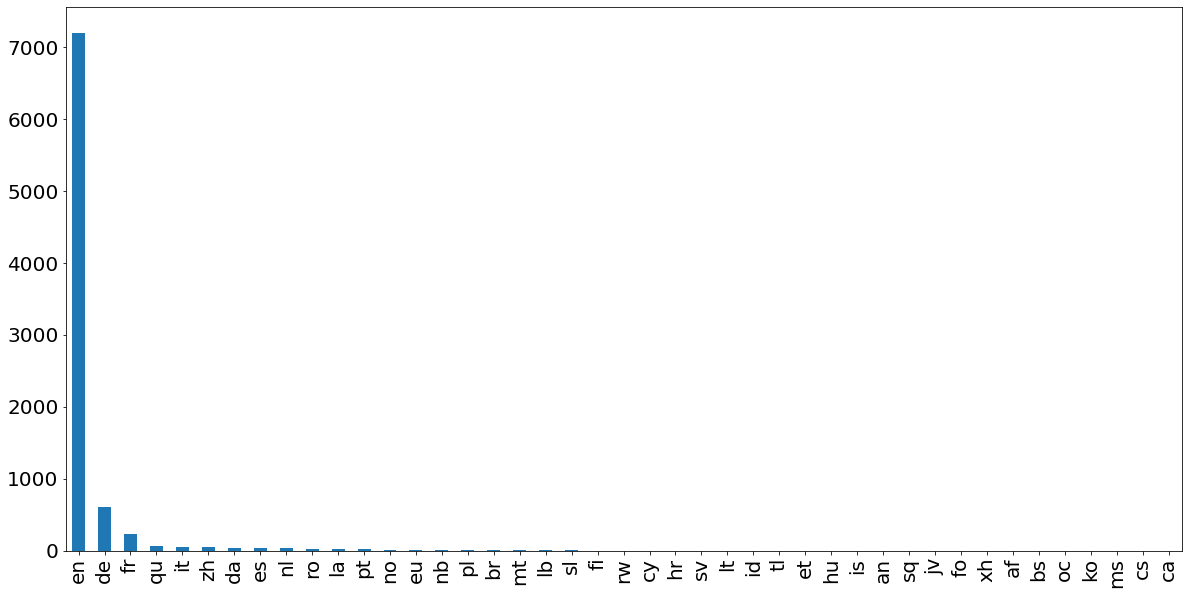

In [ ]:
# convert our list of languages to a dataframe
langs_df = pd.DataFrame(langs)

# count the number of times we see each language
langs_count = langs_df.Description.value_counts()

# horrible-looking barplot (I would suggest using R for visualization)
langs_count.plot.bar(figsize=(20,10), fontsize=20)

In [ ]:
print(langs_count)

en    7196
de     602
fr     240
qu      71
it      49
zh      47
da      37
es      37
nl      35
ro      25
la      25
pt      20
no      12
eu      11
nb      11
pl      10
br      10
mt       8
lb       7
sl       6
fi       4
rw       4
cy       3
hr       3
sv       3
lt       2
id       2
tl       2
et       2
hu       2
is       2
an       1
sq       1
jv       1
fo       1
xh       1
af       1
bs       1
oc       1
ko       1
ms       1
cs       1
ca       1
Name: Description, dtype: int64


In [ ]:
tic_df['Assignment_group'] = tic_df.Assignment_group.astype("category").cat.codes

In [ ]:
A_Grp = tic_df['Assignment_group'].unique()
Sorted_Grp = sorted(A_Grp)
print(Sorted_Grp)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]


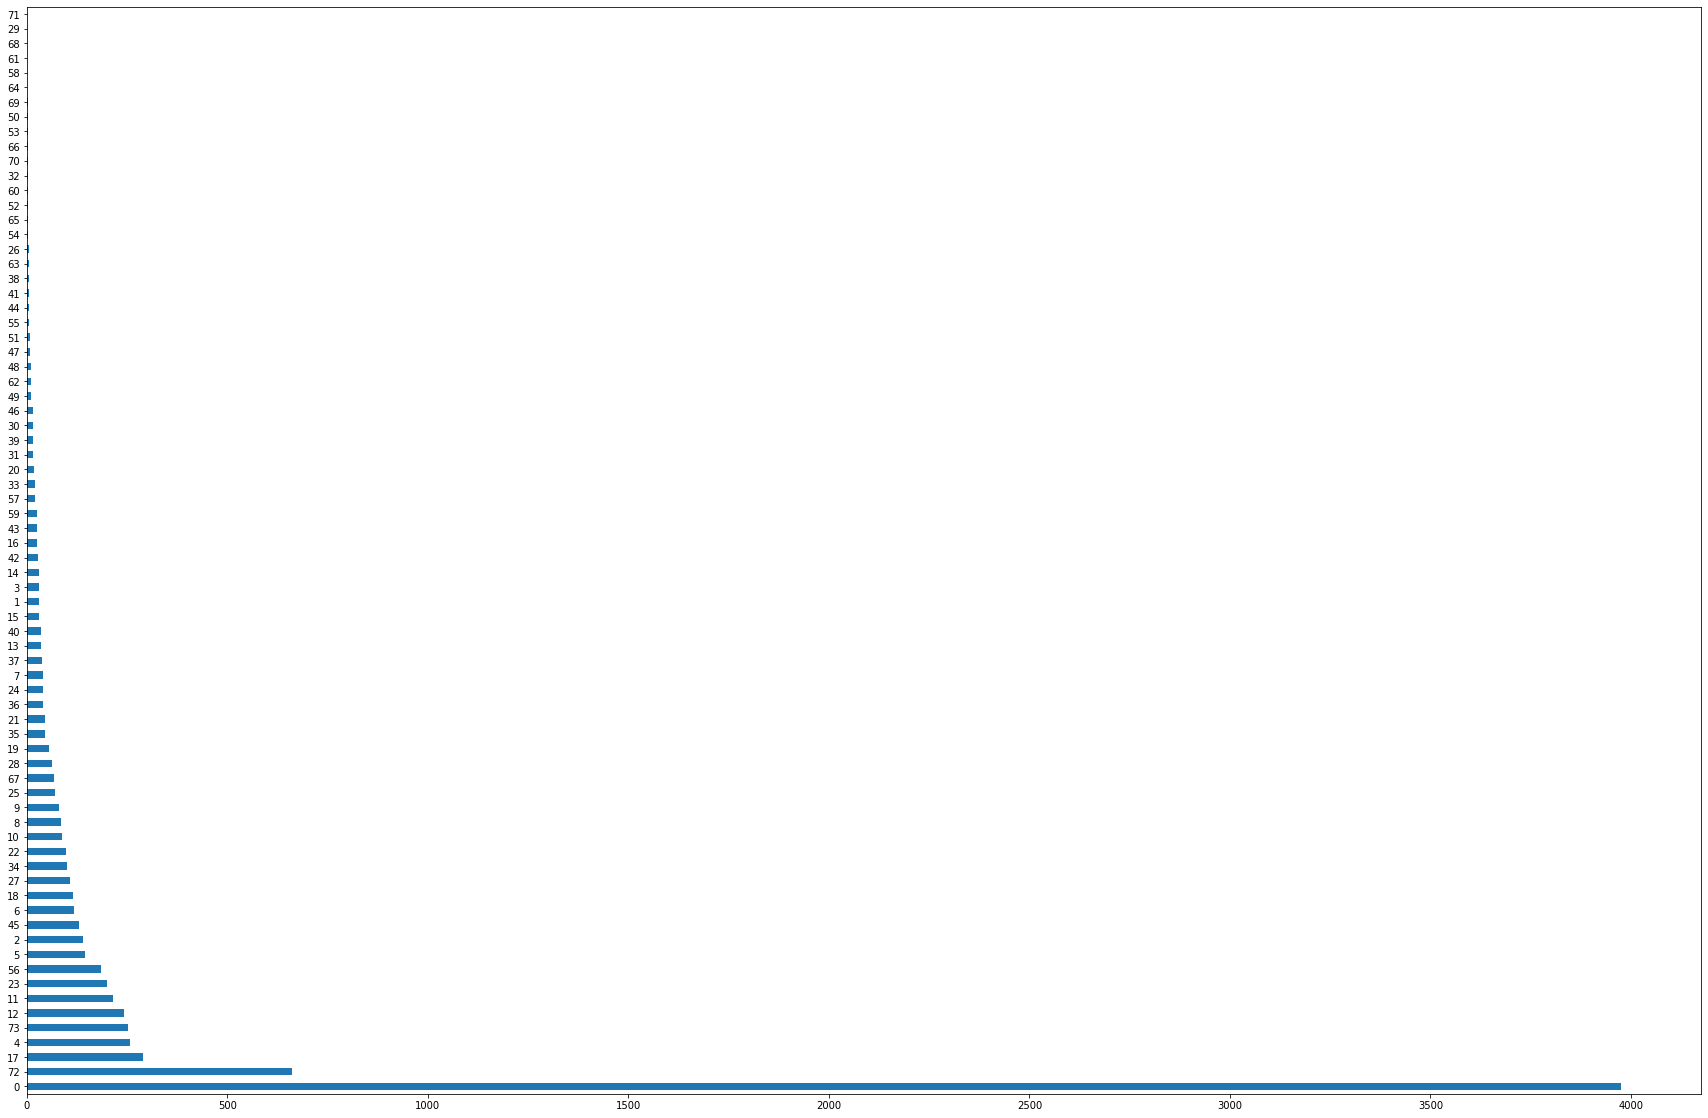

In [ ]:
import matplotlib.pyplot as plt

tic_df['Assignment_group'].value_counts().plot(kind='barh', figsize=(30,20))

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f32838bab70>,
                    color=None,
                    features=['00', '000', '0000', '000000', '000000220624227',
                              '000000221254416', '000000223172498',
                              '000000223670658', '000001', '00000etc', '00001',
                              '000010', '00002', '000020', '000030', '000040',
                              '000050', '000060', '000070', '000080', '000090',
                              '0000a0', '0000b0', '0000c0', '0000d0', '0000e0',
                              '0000f0', '0001', '00010', '000100', ...],
                    n=None, orient='v')

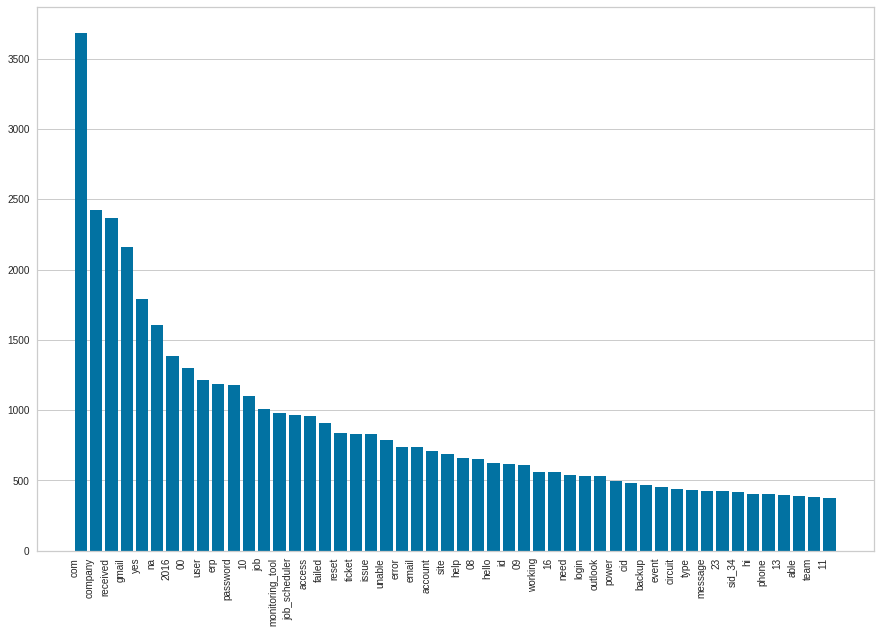

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer

from gensim import corpora

text_data = tic_df['Description'].tolist()

vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(text_data)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720))
visualizer.fit(docs)

In [ ]:
tic_df['clean_desc'] = tic_df['Short_description'] + tic_df['Description']

In [ ]:
from nltk.tokenize import word_tokenize 
text = "windowshighereducationnonameuseridmanager"
utils.split(text)

'  higher   education    name   use   rid   manager '

In [ ]:
utils.spl("windowshighereducationnonameuseridmanager")

' windows   higher   education    name   use   rid   manager '

In [ ]:
utils.preprocess(" user id rajaram/ chinnayan hi Salut, comment allez-vous, regardez le problème du serveur  Salut, comment allez-vous, regardez le problème du serveur Windows afternoon n't rajaram.chinnayan@gmail.com 20/12/2020 04:30:00 /exurcwkmsubject nonameuseridmanager")

'user rajaram chinnayan how be - look the server problem window not exurcwkm useridmanager'

In [ ]:
#import time

#start = time.time()

#tic_df['clean_desc']  = tic_df['clean_desc'].apply(utils.preprocess)

#print("Total time for preprocessing: ", (time.time() - start)/60)

In [ ]:
#tic_df.to_csv('preprocessed.csv')

In [ ]:
tic_df.empty
tic_df=pd.read_csv('preprocessed.csv')

In [ ]:
#to remove first name and last name from description

fname = [] 
lname = []

tic_df[['fname','lname']] = tic_df.Caller.str.split(expand=True) 

In [ ]:
def name(text,name):
  repl = text.replace(name,'')
  return repl

tic_df['clean_desc'] = name(tic_df['clean_desc'],tic_df['fname']) 
tic_df['clean_desc'] = name(tic_df['clean_desc'],tic_df['lname']) 

In [ ]:
tic_df.isna().sum()

Unnamed: 0           0
Short_description    0
Description          0
Caller               0
Assignment_group     0
clean_desc           1
fname                0
lname                0
dtype: int64

In [ ]:
tic_df.loc[tic_df['clean_desc'].isna()]

,Unnamed: 0,Short_description,Description,Caller,Assignment_group,clean_desc,fname,lname
1860,1860,s,s,gzjtweph mnslwfqv,0,NaN,gzjtweph,mnslwfqv


In [ ]:
tic_df.dropna(inplace=True)

In [ ]:
def aaa(text,aaa):
  sent = []
  a = text.split()
  for b,c in enumerate(a):
    if c.find(aaa) == -1:
      sent.append(a[b])
    else:
      pass  
  return ' '.join([text for text in sent])     

In [ ]:
clean_desc=[]
for i,j in enumerate(tic_df['clean_desc']):
  clean_desc.append(aaa(j,'zzz'))

In [ ]:
tic_df['clean_desc'] = clean_desc

In [ ]:
import nltk
from nltk.corpus import words
nltk.download('words')

def meanaa(text,aa):
  sent = []
  a = text.split()
  for b,c in enumerate(a):
    if c.find(aa) == -1 or c in words.words() != bool("True"):
      sent.append(a[b])
    else:
      pass  
  return ' '.join([text for text in sent])     

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
text = 'hi aahing aaliis aarrgh baaing baalim baases bazaar aac aaca aacecc aacoaz aacount aacsi aaeei aai aao aaoa aaocsa aaocse aaoeee aaoo aaoskypea aarr aas aasa aavpn aayai aaymann aaz aazea aazi abandon abap abb abba abc abca'
clean_desc1=[]
for i,j in enumerate(tic_df['clean_desc']):
  clean_desc1.append(meanaa(j,'aa'))

In [ ]:
tic_df['clean_desc'] = clean_desc1

FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3287383588>,
                    color=None,
                    features=['abandon', 'abap', 'abb', 'abba', 'abc', 'abca',
                              'abcpassword', 'abd', 'abdhtyu', 'abend',
                              'abende', 'abended', 'abgebildet', 'abgrtyreu',
                              'abhay', 'abholen', 'ability', 'abl', 'able',
                              'abode', 'abort', 'aborting', 'abovementioned',
                              'abreu', 'abrurto', 'absence', 'absolutely',
                              'abstech', 'abstechprogramdntym', 'abwfnzw', ...],
                    n=None, orient='v')

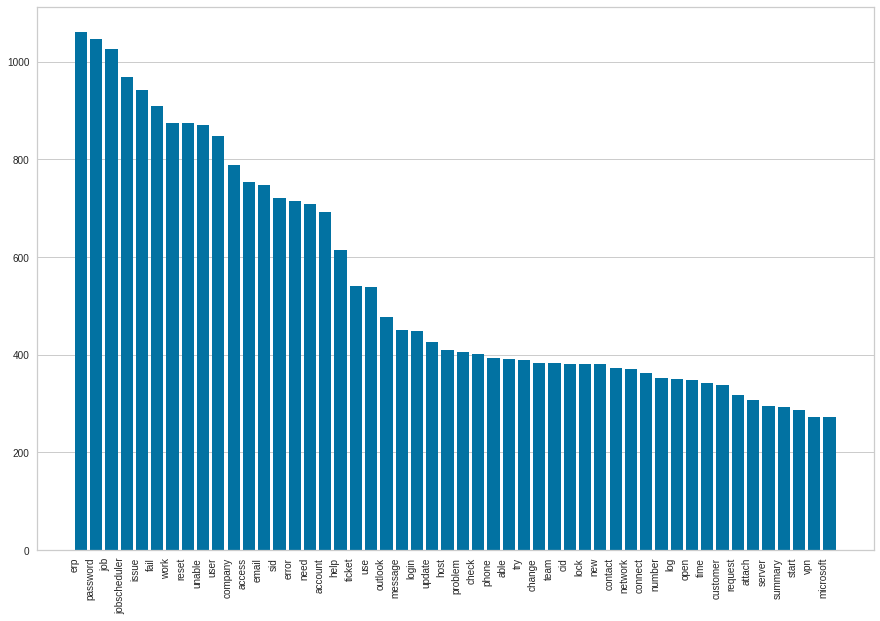

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer

from gensim import corpora

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

text_data = tic_df['clean_desc'].tolist()

vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(text_data)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720))
visualizer.fit(docs)

In [ ]:
tic_df.tail(40)

,Unnamed: 0,Short_description,Description,Caller,Assignment_group,clean_desc,fname,lname
8460,8460,abended job in job_scheduler: Job_1148,received from: monitoring_tool@company.com\n\n...,ZkBogxib QsEJzdZO,73,abended job jobscheduler abende,ZkBogxib,QsEJzdZO
8461,8461,reboot lhqsm286 (patent web uacyltoe hxgaycze ...,reboot lhqsm286 (patent web uacyltoe hxgaycze ...,uvrbhlnt bjrmalzi,72,reboot lhqsm patent web uacyltoe hxgaycze server,uvrbhlnt,bjrmalzi
8462,8462,abended job in job_scheduler: Job_1141,received from: monitoring_tool@company.com\n\n...,ZkBogxib QsEJzdZO,73,abended job jobscheduler abende,ZkBogxib,QsEJzdZO
8463,8463,kindly refer mail-renew account for visfgthal-...,"hello snhdfihytu,\nkindly refer mail-renew acc...",rmdtqfxa fwpnqdxo,12,kindly refer mail renew account for visfgthal ...,rmdtqfxa,fwpnqdxo
8464,8464,SID_1 log in issue,\n\nreceived from: rjanhbde.owfkyjcp@gmail.com...,rjanhbde owfkyjcp,0,sid log issue could uacyltoe hxgaycze system c...,rjanhbde,owfkyjcp
8465,8465,vpn è¿žæŽ¥ä¸ä¸Š,vpnè¿žä¸ä¸Šï¼Œè¯·è½¬ç»™ è´ºæ­£å¹³ atcbvglq.bd...,fcvqezmn frzyjknu,24,vpn ezza svpneza ctm,fcvqezmn,frzyjknu
8466,8466,abended job in job_scheduler: bkwin_HostName_7...,received from: monitoring_tool@company.com\n\n...,ZkBogxib QsEJzdZO,72,abended job jobscheduler bkwinhost inc abende,ZkBogxib,QsEJzdZO
8467,8467,"hi it help team, please unblock my new compan...","from: ntydihzo aeptfbgs \nsent: friday, august...",ntydihzo aeptfbgs,0,help team please unblock new company device nt...,ntydihzo,aeptfbgs
8468,8468,can you unblock my account so i can use outlo...,"from: nwfodmhc exurcwkm \nsent: friday, august...",eqzibjhw ymebpoih,0,can - unblock account use outlook app nwfodmhc...,eqzibjhw,ymebpoih
8469,8469,plant_101 value added services - one day pick ...,request to phase in additional vas customers. ...,xnqzhtwu hivumtfz,10,plant value add service one day pick route pro...,xnqzhtwu,hivumtfz


In [ ]:
docs = tic_df['clean_desc']

In [ ]:
docs=docs.tolist()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#create a vocabulary of words, 
#ignore words that appear in 85% of documents, 
#eliminate stop words
cv=CountVectorizer(ngram_range = (1, 2),stop_words=STOP_WORDS,max_features=10000)
word_count_vector=cv.fit_transform(docs)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [ ]:
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(word_count_vector)

In [ ]:
feature_names = cv.get_feature_names()

#get tfidf vector for first document
first_document_vector=tf_idf_vector[20]

#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
payslipsunable payslip,0.490458
payslipsunable,0.490458
unable check,0.477823
payslip,0.451209
check,0.229268
...,...
fine transaction,0.000000
fine try,0.000000
fine user,0.000000
finish,0.000000


In [ ]:
from gensim import corpora

text_data = tic_df['clean_desc'].apply(word_tokenize)

dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

import pickle 
pickle.dump(corpus, open('corpus.pkl','wb'))
dictionary.save('dictionary.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
from gensim.models import ldamodel

result = ldamodel.LdaModel(corpus,id2word=dictionary,num_topics = 74)
print(result.show_topics())

for idx,topic in result.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx,topic))

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(61, '0.026*"and" + 0.025*"the" + 0.024*"need" + 0.018*"please" + 0.018*"help" + 0.017*"mailto" + 0.017*"for" + 0.017*"forward" + 0.016*"-" + 0.015*"company"'), (69, '0.155*"password" + 0.125*"reset" + 0.072*"for" + 0.067*"passwordmanagementtool" + 0.065*"windows" + 0.044*"the" + 0.044*"use" + 0.037*"window" + 0.028*"account" + 0.021*"lock"'), (18, '0.049*"germany" + 0.032*"miss" + 0.021*"director" + 0.020*"switch" + 0.019*"down" + 0.018*"company" + 0.018*"kind" + 0.017*"access" + 0.017*"interface" + 0.016*"pollaurido"'), (28, '0.024*"start" + 0.023*"contact" + 0.023*"network" + 0.023*"vendor" + 0.022*"additional" + 0.022*"outage" + 0.022*"specify" + 0.022*"phone" + 0.021*"yes" + 0.021*"do"'), (63, '0.020*"the" + 0.018*"assign" + 0.016*"another" + 0.016*"and" + 0.014*"document" + 0.014*"review" + 0.014*"who" + 0.014*"scan" + 0.014*"technical" + 0.013*"model"'), (40, '0.052*"symantec" + 0.049*"till" + 0.048*"screen" + 0.034*"quick" + 0.030*"location" + 0.028*"telephonysoftware" + 0.021

In [ ]:
lda_display = pyLDAvis.gensim.prepare(result,corpus,dictionary,sort_topics=True)
pyLDAvis.display(lda_display)

In [ ]:
from gensim.models.phrases import Phrases, Phraser

tokenize = word_tokenize
docs = tic_df['clean_desc']
docs = [tokenize(doc) for doc in docs]
phrases = Phrases(docs)
bigrams = Phraser(phrases)
trigrams = Phrases(bigrams[docs])

In [ ]:
for idx in range(len(docs)):
    for token in bigrams[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigrams[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
from gensim.corpora import Dictionary

corpus1 = [[w for w in bigrams[doc]] for doc in docs]
dictionary = corpora.Dictionary(corpus1)
# Create a dictionary representation of the documents.
#dictionary = Dictionary(docs)
print('Number of unique words in initital documents:', len(dictionary))

# Filter out words that occur less than 10 documents, or more than 20% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.2)
print('Number of unique words after removing rare and common words:', len(dictionary))


Number of unique words in initital documents: 14668
Number of unique words after removing rare and common words: 1822


In [ ]:
corpus1 = [dictionary.doc2bow(doc) for doc in docs]

In [ ]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 1822
Number of documents: 8499


In [ ]:
import pickle 
pickle.dump(corpus, open('corpus1.pkl','wb'))
dictionary.save('dictionary1.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
from gensim.models import LdaModel
# Set training parameters.
num_topics = 74

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

%time model = LdaModel(corpus=corpus1, id2word=id2word, num_topics = 74)
print(model.show_topics())

for idx,topic in model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx,topic))

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

CPU times: user 4.98 s, sys: 1.61 s, total: 6.59 s
Wall time: 4.67 s
[(40, '0.102*"telephone_summary" + 0.069*"language_browser" + 0.069*"customer_number" + 0.068*"explorer_email" + 0.068*"microsoft_internet" + 0.043*"summary" + 0.041*"language" + 0.041*"email" + 0.039*"internet" + 0.039*"telephone"'), (18, '0.067*"instal" + 0.048*"group" + 0.038*"whenever" + 0.037*"driver" + 0.031*"iam" + 0.026*"form" + 0.026*"limit" + 0.026*"support" + 0.023*"and" + 0.020*"think"'), (73, '0.032*"unable_load" + 0.032*"erp_logon" + 0.031*"good_day" + 0.028*"day" + 0.028*"certificate" + 0.022*"erp" + 0.021*"load" + 0.019*"see_attach" + 0.018*"-" + 0.017*"be"'), (14, '0.126*"server" + 0.095*"server_host" + 0.091*"host" + 0.038*"additional_information" + 0.034*"lhqsm" + 0.031*"label" + 0.029*"available" + 0.028*"label_dat" + 0.027*"not" + 0.027*"server_over"'), (42, '0.034*"please" + 0.023*"plant" + 0.021*"have" + 0.020*"not" + 0.020*"sale_org" + 0.018*"with" + 0.017*"activate" + 0.017*"-" + 0.017*"see" +

In [ ]:
lda_display = pyLDAvis.gensim.prepare(model,corpus1,dictionary,sort_topics=True)
pyLDAvis.display(lda_display)

In [ ]:
sentences = tic_df['clean_desc'].tolist()

In [ ]:
vectorizer = CountVectorizer(stop_words=STOP_WORDS,max_features=10000)
vectorizer.fit(sentences)
vectorizer.vocabulary_

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


{'login': 4404,
 'issue': 4069,
 'verify': 8774,
 'user': 8638,
 'detail': 2094,
 'employee': 2838,
 'manager': 4487,
 'check': 1293,
 'reset': 6413,
 'password': 5089,
 'advise': 209,
 'caller': 1201,
 'confirm': 1428,
 'able': 18,
 'resolve': 6439,
 'outlook': 4928,
 'team': 7871,
 'meeting': 4557,
 'skype': 7229,
 'etc': 3111,
 'appear': 542,
 'calendar': 1196,
 'somebody': 7343,
 'correct': 1554,
 'kind': 4219,
 'log': 4401,
 'vpn': 8916,
 'best': 1059,
 'unable': 8418,
 'access': 45,
 'hrtool': 3856,
 'pageunable': 5022,
 'page': 5018,
 'error': 3027,
 'engineering': 2880,
 'tool': 8151,
 'skypeunable': 7238,
 'event': 3180,
 'critical': 1650,
 'host': 3836,
 'company': 1386,
 'com': 1369,
 'value': 8720,
 'threshold': 8019,
 'oracle': 4889,
 'sid': 7154,
 'erpdata': 2986,
 'psa': 5805,
 'datum': 1907,
 'perpsr': 5217,
 'ticketno': 8054,
 'employment': 2843,
 'status': 7519,
 'new': 4741,
 'non': 4782,
 'enter': 2912,
 'disable': 2226,
 'add': 163,
 'outlookunable': 4951,
 'ticket

In [ ]:
X = vectorizer.transform(sentences).toarray()

In [ ]:
y = tic_df['Assignment_group'].values

In [ ]:
'''Classifiers'''
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import model

Using TensorFlow backend.


In [ ]:
model_dict = {'Logistic Regression' : LogisticRegression(max_iter=1000),
              'Stochastic Gradient Descent' : SGDClassifier(random_state=3, loss='log'),
              'Random Forest': RandomForestClassifier(random_state=3),
              'Decsision Tree': DecisionTreeClassifier(random_state=3),
              'Support Vector Machines': LinearSVC(max_iter=10000),
              'AdaBoost': AdaBoostClassifier(random_state=3),
              'Gaussian Naive Bayes': GaussianNB(),
              'K Nearest Neighbor': KNeighborsClassifier()
              }

model.score_matrix(model_dict,X,y)

Total Time for Logistic Regression is  3.0830187598864236
Total Time for Stochastic Gradient Descent is  2.2879295269648234
Total Time for Random Forest is  0.5812831401824952
Total Time for Decsision Tree is  0.24839657545089722
Total Time for Support Vector Machines is  0.054535897572835286
Total Time for AdaBoost is  1.0021949529647827
Total Time for Gaussian Naive Bayes is  0.1346380631128947
Total Time for K Nearest Neighbor is  3.662813591957092


,model_name,accuracy_score,precision_score,recall_score,f1_score
4,Support Vector Machines,66.4706,0.58134,0.339353,0.343172
1,Stochastic Gradient Descent,67.7059,0.741722,0.25077,0.287501
0,Logistic Regression,67.5294,0.732291,0.248079,0.278435
3,Decsision Tree,60.1765,0.403537,0.2544,0.237671
2,Random Forest,64.3529,0.801696,0.195922,0.229369
6,Gaussian Naive Bayes,38.6471,0.283432,0.268008,0.173472
7,K Nearest Neighbor,58.4706,0.846072,0.120591,0.136836
5,AdaBoost,52.0588,0.966989,0.0590946,0.0356471


## Apply Keras Tokenizer of headline column of your data.  
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column tic_df['clean_desc'] using .fit_on_texts()

In [ ]:
#We will check the maximum number of words that can be present in a description , this will help us in padding later

max_len = tic_df['clean_desc'].apply(lambda x:len(str(x).split())).max()

print('The maximum words in the headline is',max_len)

The maximum words in the headline is 449


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU,SimpleRNN
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import BatchNormalization
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from tensorflow.keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from tensorflow.keras.preprocessing import sequence, text
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding ,Bidirectional
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
max_features = 10000
max_len = 1000
embed_size = 300

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(tic_df['clean_desc'])
list_tokenized_train = tokenizer.texts_to_sequences(tic_df['clean_desc'])

word_index = tokenizer.word_index
num_words = len(tokenizer.word_index) + 1

X = pad_sequences(list_tokenized_train, maxlen=max_len)
y = tf.keras.utils.to_categorical( tic_df['Assignment_group']) 

In [ ]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]


In [ ]:
RNN = model.RNN(METRICS,num_words,embed_size,max_len)
RNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 300)         4011300   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               40100     
_________________________________________________________________
dense_1 (Dense)              (None, 74)                7474      
Total params: 4,058,874
Trainable params: 4,058,874
Non-trainable params: 0
_________________________________________________________________


# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [ ]:
RNN.fit(X,y,batch_size=100,epochs=5,validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6799 samples, validate on 1700 samples
Epoch 1/5
6799/6799 [==============================] - 51s 7ms/step - loss: 0.1996 - tp: 1048.7941 - fp: 25670.5000 - tn: 226178.4219 - fn: 2401.1912 - accuracy: 0.8315 - precision: 0.0377 - recall: 0.3766 - auc: 0.6823 - val_loss: 0.0518 - val_tp: 1435.2354 - val_fp: 27918.6465 - val_tn: 534108.3750 - val_fn: 6263.7646 - val_accuracy: 0.9398 - val_precision: 0.0489 - val_recall: 0.1870 - val_auc: 0.7425
Epoch 2/5
6799/6799 [==============================] - 49s 7ms/step - loss: 0.0480 - tp: 1598.4854 - fp: 28073.3535 - tn: 844203.1875 - fn: 10350.5000 - accuracy: 0.9557 - precision: 0.0539 - recall: 0.1365 - auc: 0.7772 - val_loss: 0.0485 - val_tp: 1653.0000 - val_fp: 28132.0000 - val_tn: 1154322.0000 - val_fn: 14545.0000 - val_accuracy: 0.9644 - val_precision: 0.0555 - val_recall: 0.1021 - val_auc: 0.8022
Epoch 3/5
6799/6799 [==============================] - 49s 7ms/step - loss: 0.0464 - tp: 1653.0000 - fp: 28132.0000 - tn: 1464571.000

In [ ]:
loss, tp,fp,tn,fn,accuracy,precision,recall,auc  = RNN.evaluate(X,y,verbose=0)
scores_model = []
scores_model.append({'Model': 'SimpleRNN','AUC_Score': auc*100,'Accuracy': accuracy*100,'Recall': recall*100,'Precision': precision*100,'F1_Score':(2 * (precision * recall) / (precision + recall)
)*100})
print(scores_model)

[{'Model': 'SimpleRNN', 'AUC_Score': 85.91509461402893, 'Accuracy': 97.8994369506836, 'Recall': 11.466668546199799, 'Precision': 14.61985558271408, 'F1_Score': 12.852692626418595}]


# Get the Word Embeddings using Embedding file as given below.

In [ ]:
# load the GloVe vectors in a dictionary:

embeddings_index = {}
f = open('glove.6B.300d.txt','r',encoding='utf-8')
for line in tqdm(f):
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray([float(val) for val in values[1:]])
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:42, 9474.82it/s] 

Found 400000 word vectors.


# Create a weight matrix for words in training docs

In [ ]:
# create an embedding matrix for the words we have in the dataset
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████| 13370/13370 [00:00<00:00, 575765.62it/s]


In [ ]:
SILSTM = model.SILSTM(METRICS,num_words,embed_size,embedding_matrix,max_len)
SILSTM.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 300)         4011300   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 74)                7474      
Total params: 4,179,174
Trainable params: 167,874
Non-trainable params: 4,011,300
_________________________________________________________________


In [ ]:
SILSTM.fit(X,y,batch_size=100,epochs=5,validation_split=0.2)

Train on 6799 samples, validate on 1700 samples
Epoch 1/5
6799/6799 [==============================] - 119s 17ms/step - loss: 0.2124 - tp: 7881.6470 - fp: 57158.1172 - tn: 3917251.2500 - fn: 46562.3398 - accuracy: 0.9743 - precision: 0.1217 - recall: 0.1448 - auc: 0.8452 - val_loss: 0.0512 - val_tp: 8259.1172 - val_fp: 59247.2930 - val_tn: 4225341.5000 - val_fn: 50433.8828 - val_accuracy: 0.9747 - val_precision: 0.1223 - val_recall: 0.1407 - val_auc: 0.8407
Epoch 2/5
6799/6799 [==============================] - 118s 17ms/step - loss: 0.0474 - tp: 8596.5732 - fp: 59501.4570 - tn: 4535337.0000 - fn: 54346.4102 - accuracy: 0.9755 - precision: 0.1262 - recall: 0.1366 - auc: 0.8428 - val_loss: 0.0478 - val_tp: 9246.7646 - val_fp: 59882.9414 - val_tn: 4845133.0000 - val_fn: 57945.2344 - val_accuracy: 0.9763 - val_precision: 0.1338 - val_recall: 0.1376 - val_auc: 0.8454
Epoch 3/5
6799/6799 [==============================] - 118s 17ms/step - loss: 0.0453 - tp: 10383.5879 - fp: 60500.9258 - tn:

In [ ]:
loss, tp,fp,tn,fn,accuracy,precision,recall,auc  = SILSTM.evaluate(X,y,verbose=0)
print('Accuracy: %f' % (accuracy*100))
print('Area under the curve: %f' % (auc*100))

scores_model.append({'Model': 'Simple LSTM','AUC_Score': auc*100,'Accuracy': accuracy*100,'Recall': recall*100,'Precision': precision*100,'F1_Score':(2 * (precision * recall) / (precision + recall)
)*100})
print(scores_model)

Accuracy: 98.017311
Area under the curve: 86.302817
[{'Model': 'SimpleRNN', 'AUC_Score': 85.91509461402893, 'Accuracy': 97.8994369506836, 'Recall': 11.466668546199799, 'Precision': 14.61985558271408, 'F1_Score': 12.852692626418595}, {'Model': 'Simple LSTM', 'AUC_Score': 86.30281686782837, 'Accuracy': 98.0173110961914, 'Recall': 19.292527437210083, 'Precision': 22.62192964553833, 'F1_Score': 20.82499589616856}]


In [ ]:
BILSTM = model.BILSTM(METRICS,num_words,embed_size,embedding_matrix,max_len)
BILSTM.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1000, 300)         4011300   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 600)               1442400   
_________________________________________________________________
dense_3 (Dense)              (None, 74)                44474     
Total params: 5,498,174
Trainable params: 1,486,874
Non-trainable params: 4,011,300
_________________________________________________________________


In [ ]:
BILSTM.fit(X,y,batch_size=100,epochs=5,validation_split=0.2)

Train on 6799 samples, validate on 1700 samples
Epoch 1/5
6799/6799 [==============================] - 226s 33ms/step - loss: 0.1098 - tp: 21168.3965 - fp: 74748.4688 - tn: 7622223.5000 - fn: 84269.5859 - accuracy: 0.9796 - precision: 0.2207 - recall: 0.2008 - auc: 0.8605 - val_loss: 0.0486 - val_tp: 22229.4707 - val_fp: 75822.1797 - val_tn: 7931328.0000 - val_fn: 87457.5312 - val_accuracy: 0.9799 - val_precision: 0.2267 - val_recall: 0.2027 - val_auc: 0.8606
Epoch 2/5
6799/6799 [==============================] - 225s 33ms/step - loss: 0.0450 - tp: 23309.6172 - fp: 76646.2031 - tn: 8240756.0000 - fn: 90627.3672 - accuracy: 0.9802 - precision: 0.2332 - recall: 0.2046 - auc: 0.8616 - val_loss: 0.0469 - val_tp: 24549.2344 - val_fp: 77510.6484 - val_tn: 8550066.0000 - val_fn: 93636.7656 - val_accuracy: 0.9804 - val_precision: 0.2405 - val_recall: 0.2077 - val_auc: 0.8627
Epoch 3/5
6799/6799 [==============================] - 228s 34ms/step - loss: 0.0426 - tp: 25954.9121 - fp: 78377.9141 -

In [ ]:
loss, tp,fp,tn,fn,accuracy,precision,recall,auc  = BILSTM.evaluate(X,y,verbose=0)
print('Accuracy: %f' % (accuracy*100))
print('Area under the curve: %f' % (auc*100))

scores_model.append({'Model': 'Bi LSTM','AUC_Score': auc*100,'Accuracy': accuracy*100,'Recall': recall*100,'Precision': precision*100,'F1_Score':(2 * (precision * recall) / (precision + recall)
)*100})
print(scores_model)

Accuracy: 98.223543
Area under the curve: 87.208956
[{'Model': 'SimpleRNN', 'AUC_Score': 85.91509461402893, 'Accuracy': 97.8994369506836, 'Recall': 11.466668546199799, 'Precision': 14.61985558271408, 'F1_Score': 12.852692626418595}, {'Model': 'Simple LSTM', 'AUC_Score': 86.30281686782837, 'Accuracy': 98.0173110961914, 'Recall': 19.292527437210083, 'Precision': 22.62192964553833, 'F1_Score': 20.82499589616856}, {'Model': 'Bi LSTM', 'AUC_Score': 87.20895648002625, 'Accuracy': 98.22354316711426, 'Recall': 23.724938929080963, 'Precision': 30.069154500961304, 'F1_Score': 26.52294364295401}]


In [ ]:
GRUMOD = model.GRU_MOD(METRICS,num_words,embed_size,embedding_matrix,max_len)
GRUMOD.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1000, 300)         4011300   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 1000, 300)         0         
_________________________________________________________________
gru_1 (GRU)                  (None, 300)               540900    
_________________________________________________________________
dense_4 (Dense)              (None, 74)                22274     
Total params: 4,574,474
Trainable params: 563,174
Non-trainable params: 4,011,300
_________________________________________________________________


In [ ]:
GRUMOD.fit(X,y,batch_size=100,epochs=5,validation_split=0.2)

Train on 6799 samples, validate on 1700 samples
Epoch 1/5
6799/6799 [==============================] - 132s 19ms/step - loss: 0.1140 - tp: 37399.5742 - fp: 93090.8125 - tn: 11326447.0000 - fn: 119032.4141 - accuracy: 0.9817 - precision: 0.2866 - recall: 0.2391 - auc: 0.8702 - val_loss: 0.0476 - val_tp: 37939.6484 - val_fp: 93626.7031 - val_tn: 11636087.0000 - val_fn: 122741.3516 - val_accuracy: 0.9818 - val_precision: 0.2884 - val_recall: 0.2361 - val_auc: 0.8701
Epoch 2/5
6799/6799 [==============================] - 132s 19ms/step - loss: 0.0440 - tp: 38907.4258 - fp: 94133.5625 - tn: 11945827.0000 - fn: 126023.5625 - accuracy: 0.9820 - precision: 0.2924 - recall: 0.2359 - auc: 0.8707 - val_loss: 0.0463 - val_tp: 40091.6484 - val_fp: 94855.5312 - val_tn: 12255284.0000 - val_fn: 129088.3516 - val_accuracy: 0.9821 - val_precision: 0.2971 - val_recall: 0.2370 - val_auc: 0.8712
Epoch 3/5
6799/6799 [==============================] - 132s 19ms/step - loss: 0.0413 - tp: 41547.4844 - fp: 9558

In [ ]:
loss, tp,fp,tn,fn,accuracy,precision,recall,auc  = GRUMOD.evaluate(X,y,verbose=0)
print('Accuracy: %f' % (accuracy*100))
print('Area under the curve: %f' % (auc*100))

scores_model.append({'Model': ' GRU ','AUC_Score': auc*100,'Accuracy': accuracy*100,'Recall': recall*100,'Precision': precision*100,'F1_Score':(2 * (precision * recall) / (precision + recall)
)*100})
print(scores_model)

Accuracy: 98.326683
Area under the curve: 87.760872
[{'Model': 'SimpleRNN', 'AUC_Score': 85.91509461402893, 'Accuracy': 97.8994369506836, 'Recall': 11.466668546199799, 'Precision': 14.61985558271408, 'F1_Score': 12.852692626418595}, {'Model': 'Simple LSTM', 'AUC_Score': 86.30281686782837, 'Accuracy': 98.0173110961914, 'Recall': 19.292527437210083, 'Precision': 22.62192964553833, 'F1_Score': 20.82499589616856}, {'Model': 'Bi LSTM', 'AUC_Score': 87.20895648002625, 'Accuracy': 98.22354316711426, 'Recall': 23.724938929080963, 'Precision': 30.069154500961304, 'F1_Score': 26.52294364295401}, {'Model': ' GRU ', 'AUC_Score': 87.76087164878845, 'Accuracy': 98.3266830444336, 'Recall': 25.907349586486816, 'Precision': 34.24816131591797, 'F1_Score': 29.499511336389006}]


Value closer to 1 is Sarcastic and a value close to 0 is a not Sarcastic. I can clearly see that the model prediction is doing well for all the samples.
In the above approach we learn word embedding as part of fitting a neural network model.

In [ ]:
# Visualization of Results obtained from various Deep learning models
results = pd.DataFrame(scores_model).sort_values(by='AUC_Score',ascending=False)
results.style.background_gradient(cmap='Blues')

,Model,AUC_Score,Accuracy,Recall,Precision,F1_Score
3,GRU,87.760872,98.326683,25.907350,34.248161,29.499511
2,Bi LSTM,87.208956,98.223543,23.724939,30.069155,26.522944
1,Simple LSTM,86.302817,98.017311,19.292527,22.621930,20.824996
0,SimpleRNN,85.915095,97.899437,11.466669,14.619856,12.852693


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
fig = go.Figure(go.Funnelarea(
    text =results.Model,
    values = results.Recall,
    title = {"position": "top center", "text": "Funnel-Chart of Assignment group Distribution"}
    ))
fig.show()

NameError: ignored